# CS421: Introduction to Machine Learning
## Project: Predicting Credit Card Customer Churn
### Performance Evaluation
---

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.metrics import classification_report

In [25]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

y_train = df_train[["attrition_flag"]]
x_train = df_train.drop("attrition_flag", axis=1)

y_test = df_test[["attrition_flag"]]
x_test = df_test.drop("attrition_flag", axis=1)

In [26]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def build_model(model):
    global x_train
    global y_train
    
    smote_sampler = SMOTE(random_state=2021)

    scale_features = x_train.columns

    scaler = ColumnTransformer(transformers=[ ('scaler', MinMaxScaler(), scale_features) ])

    pipeline = Pipeline(steps = [['scaler', scaler],
                                 ['smote', smote_sampler],
                                 ['classifier', model]])

    pipeline.fit(x_train, y_train.values.ravel() )

    y_pred = pipeline.predict(x_test)
    
    return pipeline, y_pred

In [27]:
from sklearn.metrics import recall_score, fbeta_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix

def display_metrics(model_name, y_pred):
    print(f"-----------------------PERFORMANCE EVALUATION: {model_name}--------------------  ")
    # print(f"Recall: {recall_score(y_test, y_pred, average='macro')} ")
    # print(f"Fbeta2: {fbeta_score(y_test, y_pred, beta=2, average='macro') } ")

    cm = confusion_matrix(y_test, y_pred) 
    recall = cm[1][1] / (cm[1][1] + cm[1][0])
    precision = cm[1][1] / (cm[1][1] + cm[0][1])
    fbeta_score = ( (1+4) * (precision * recall) ) / (4 * precision + recall)
    print(f"Recall: {recall} ")
    print(f"Precision: {precision} ")
    print(f"Fbeta2: {fbeta_score}")

    # print(f"AUC Score: {roc_auc_score(y_test, y_pred)} ")
    
    
    labels = ['Existing Customer', 'Attrited Customer']

    diagram = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    diagram.plot(cmap=plt.cm.Blues)
    plt.show()

    print(classification_report(y_test, y_pred, digits=6))

# 1. Logistic Regression
---

-----------------------PERFORMANCE EVALUATION: Logistic Regression--------------------  
Recall: 0.7169230769230769 
Precision: 0.43068391866913125 
Fbeta2: 0.6328082563824009


/Users/joshuawong/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


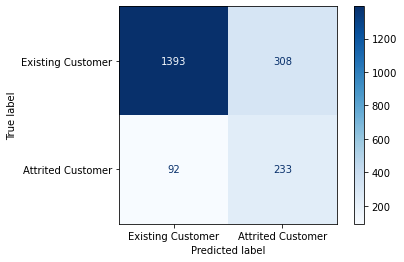

              precision    recall  f1-score   support

           0   0.938047  0.818930  0.874451      1701
           1   0.430684  0.716923  0.538106       325

    accuracy                       0.802567      2026
   macro avg   0.684366  0.767927  0.706278      2026
weighted avg   0.856659  0.802567  0.820496      2026



In [28]:
lr_clf = LogisticRegression(
    C=0.5,
    fit_intercept=True,
    max_iter=10,
    multi_class='auto',
    penalty='l2',
    solver='sag',
    random_state=2021
)

lr_pipeline, lr_ypred = build_model(lr_clf)
display_metrics('Logistic Regression', lr_ypred)

# 2. Support Vector Classifier (SVC)
---

-----------------------PERFORMANCE EVALUATION: Support Vector Classifier--------------------  
Recall: 0.8215384615384616 
Precision: 0.559748427672956 
Fbeta2: 0.7512661789532921


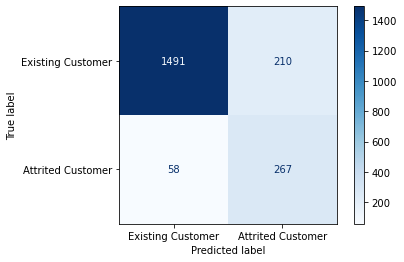

              precision    recall  f1-score   support

           0   0.962556  0.876543  0.917538      1701
           1   0.559748  0.821538  0.665835       325

    accuracy                       0.867720      2026
   macro avg   0.761152  0.849041  0.791687      2026
weighted avg   0.897940  0.867720  0.877162      2026



In [29]:
svc_clf = SVC(C=1000, gamma=0.1, kernel='rbf', random_state = 2021, probability=True)

svc_pipeline, svc_ypred = build_model(svc_clf)
display_metrics('Support Vector Classifier', svc_ypred)

# 3. RandomForest
---

-----------------------PERFORMANCE EVALUATION: Random Forest--------------------  
Recall: 0.8584615384615385 
Precision: 0.7420212765957447 
Fbeta2: 0.8323389021479713


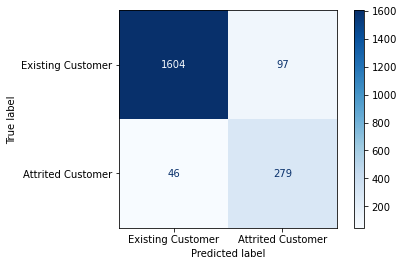

              precision    recall  f1-score   support

           0   0.972121  0.942975  0.957326      1701
           1   0.742021  0.858462  0.796006       325

    accuracy                       0.929418      2026
   macro avg   0.857071  0.900718  0.876666      2026
weighted avg   0.935210  0.929418  0.931448      2026



In [30]:
rf_clf = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=8,
                                    min_samples_split=2, n_estimators=125,
                                    random_state=2021)

rf_pipeline, rf_ypred = build_model(rf_clf)
display_metrics('Random Forest', rf_ypred)

# 4. XGBoost
---

-----------------------PERFORMANCE EVALUATION: XGBoost--------------------  
Recall: 0.8738461538461538 
Precision: 0.8304093567251462 
Fbeta2: 0.8647990255785628


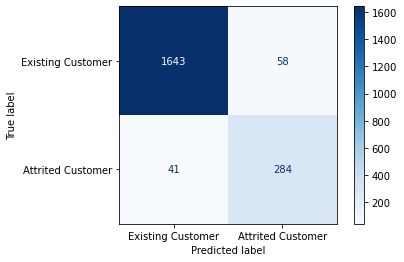

              precision    recall  f1-score   support

           0   0.975653  0.965902  0.970753      1701
           1   0.830409  0.873846  0.851574       325

    accuracy                       0.951135      2026
   macro avg   0.903031  0.919874  0.911164      2026
weighted avg   0.952354  0.951135  0.951635      2026



In [31]:
xgb_clf = XGBClassifier(learning_rate=0.25,
                    max_depth=3,
                    gamma=1,
                    subsample=0.9,
                    eval_metric="logloss", 
                    use_label_encoder=False, 
                    random_state=2021)

xgb_pipeline, xgb_ypred = build_model(xgb_clf)
display_metrics("XGBoost", xgb_ypred)

# 5. ROC Curve

In [32]:
from sklearn.metrics import roc_curve

proba_dict = {
    "Logistic Regression": lr_clf.predict_proba(x_test)[:, 1],
    "SVC": svc_clf.predict_proba(x_test)[:, 1],
    "RandomForest": rf_clf.predict_proba(x_test)[:, 1],
    "XGBoost": xgb_clf.predict_proba(x_test)[:, 1]
}

/Users/joshuawong/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/joshuawong/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/joshuawong/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


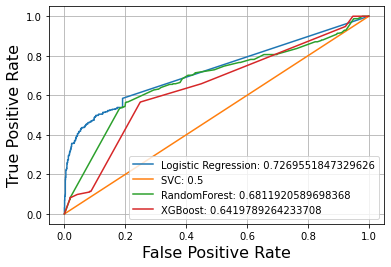

<Figure size 1080x864 with 0 Axes>

In [33]:
for model, proba in proba_dict.items():
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc = roc_auc_score(y_test, proba)
    plt.plot(fpr, tpr, label=f"{model}: {auc}")
    
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc='best')
plt.grid(True)
plt.figure(figsize=(15, 12))
plt.show()

# 6. XGBoost Feature Importance

ImportError: You must install graphviz to plot tree

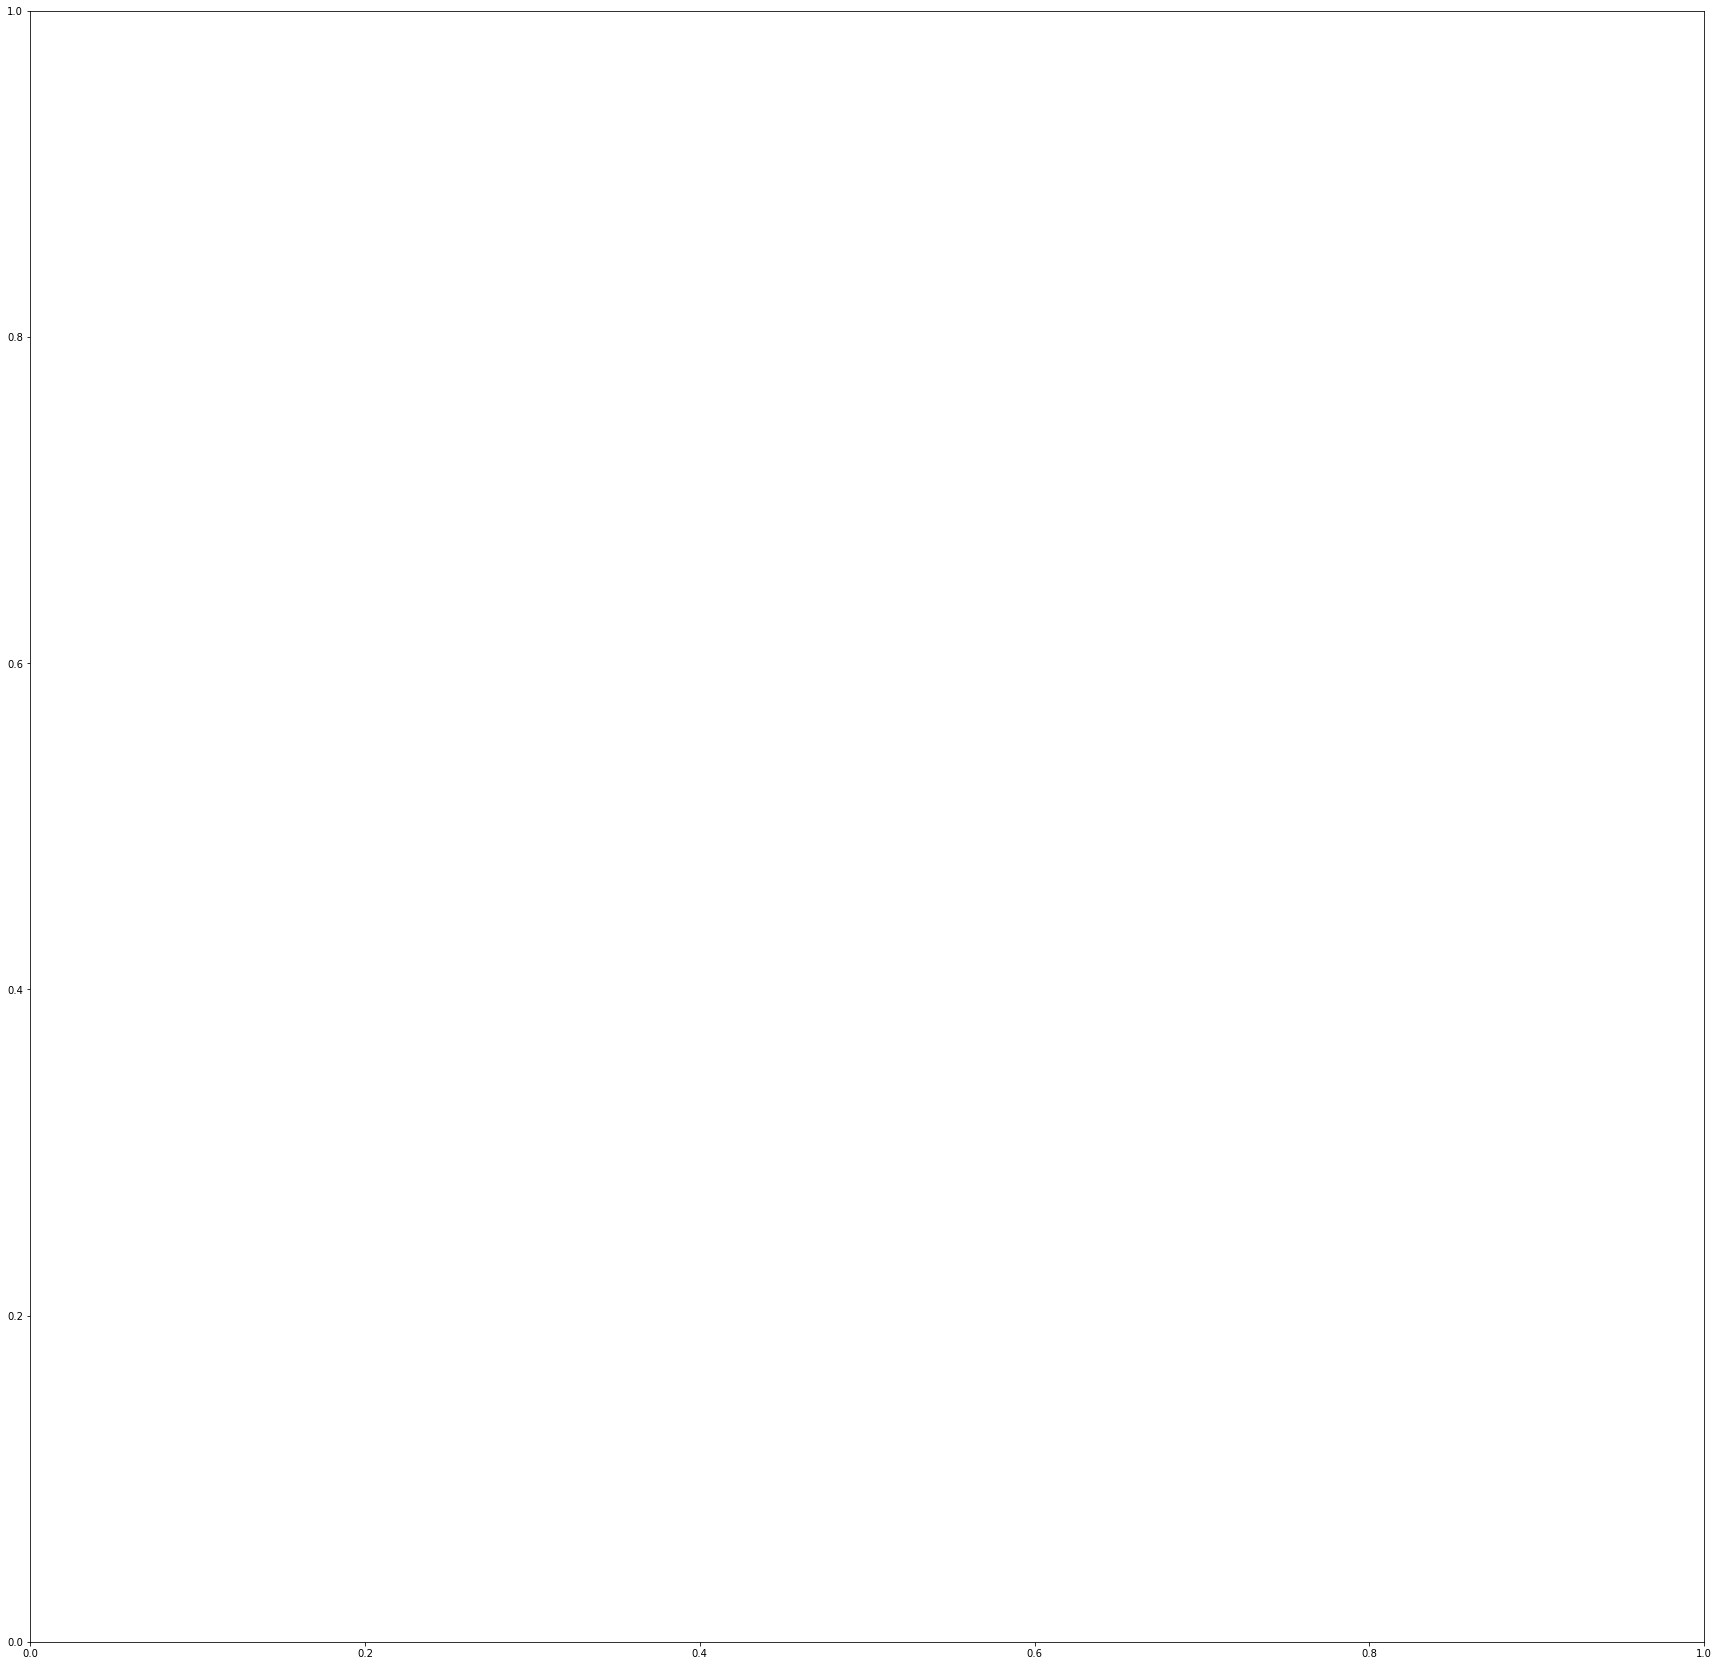

In [34]:
fig, ax = plt.subplots(figsize=(30, 30))
# xgb_clf.get_booster().feature_names = x_train.columns
plot_tree(xgb_clf, ax=ax, fmap="./column_names.txt", dpi=600)
plt.show()

# 7. Random Forest Feature Importance

In [ ]:
rf_importance = pd.DataFrame( rf_pipeline[2].feature_importances_, x_test.columns)
rf_importance.sort_values(by=[0], ascending=False)

,0
total_trans_amt,0.325917
total_count_change_q4_q1,0.161270
total_revolving_bal,0.153602
avg_utilization_ratio,0.076609
months_inactive_12_mon,0.073716
total_relationship_count,0.065629
total_amt_change_q4_q1,0.055037
contacts_count_12_mon,0.048816
credit_limit,0.026882
dependent_count,0.012521
